In [83]:
from sklearn.datasets import load_digits
import pandas as pd

In [84]:
digit=load_digits()

In [85]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [86]:
digit.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [87]:
import matplotlib.pyplot as plt

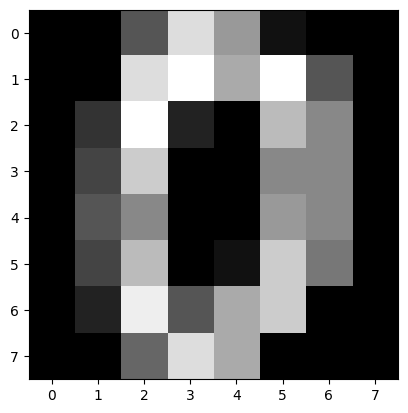

In [88]:
plt.gray()
plt.imshow(digit.data[0].reshape(8,8))    #we can see some pixels doesnt affect the image like (8,1),(8,2),(0,0)  etc.
                                          #so we can remove these ones using pca

In [89]:
df=pd.DataFrame(data=digit.data,columns=digit.feature_names)

In [90]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [91]:
x=df
y=digit.target

In [92]:
df.shape

(1797, 64)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=30)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
lr=LogisticRegression(max_iter=2000)

In [97]:
lr.fit(xtrain,ytrain)

c:\Users\Designoo 09\Desktop\editoo\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [98]:
lr.score(xtest,ytest)

0.975

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca=PCA(0.95) #this means 95 percent of important data should be retained

In [101]:
x=pca.fit_transform(x)

In [102]:
x.shape  #no of unimportant columns are removed

(1797, 29)

In [103]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=30)

In [104]:
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=2000)

In [105]:
lr.score(xtest,ytest)   #its not necessary it will increase the accuracy

0.9694444444444444